In [1]:
import numpy as np
import pandas as pd
import os
import h5py
import matplotlib
from matplotlib import pyplot as plt
# %matplotlib inline
# matplotlib.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Keras
import keras
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import backend as K
from keras import regularizers

# Tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# Custom imports
from physionet_processing import (fetch_h5data, spectrogram, 
                                  special_parameters, transformed_stats)

from physionet_generator import DataGenerator

print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

#Open hdf5 file, load the labels and define training/validation splits

# Data folder and hdf5 dataset file
data_root = os.path.normpath('.')
#data_root = os.path.normpath('/media/sf_vbshare/physionet_data/')
#data_root = os.path.normpath('/home/ubuntu/projects/csproject')
# hd_file = os.path.join(data_root, 'physio.h5')
hd_file = "/Users/sanda/Documents/esp_dev_files/physio.h5"
label_file = "/Users/sanda/Documents/esp_dev_files/ecg_project_2/cnn_ecg_keras/REFERENCE-v3.csv"

# mac 
# hd_file = "/Users/macbookpro/Documents/physio.h5"
# label_file = "/Users/macbookpro/Documents/ecg_project_2/cnn_ecg_keras/REFERENCE-v3.csv"


# Open hdf5 file
h5file =  h5py.File(hd_file, 'r')

# Get a list of dataset names 
dataset_list = list(h5file.keys())

# Load the labels
label_df = pd.read_csv(label_file, header = None, names = ['name', 'label'])
# Filter the labels that are in the small demo set
label_df = label_df[label_df['name'].isin(dataset_list)]

# Encode labels to integer numbers
label_set = list(sorted(label_df.label.unique()))
encoder = LabelEncoder().fit(label_set)
label_set_codings = encoder.transform(label_set)
label_df = label_df.assign(encoded = encoder.transform(label_df.label))


# Split the IDs in training and validation set
test_split = 0.33
idx = np.arange(label_df.shape[0])
id_train, id_val, _, _ = train_test_split(idx, idx, 
                                         test_size = test_split,
                                         shuffle = True,
                                         random_state = 123)

# Store the ids and labels in dictionaries
partition = {'train': list(label_df.iloc[id_train,].name), 
             'validation': list(label_df.iloc[id_val,].name)}

labels = dict(zip(label_df.name, label_df.encoded))

#set up batch generator
# Parameters needed for the batch generator

# Maximum sequence length
max_length = 18286

# Output dimensions
sequence_length = max_length
spectrogram_nperseg = 64 # Spectrogram window
spectrogram_noverlap = 32 # Spectrogram overlap
n_classes = len(label_df.label.unique())
batch_size = 32

# calculate image dimensions
data = fetch_h5data(h5file, [0], sequence_length)
_, _, Sxx = spectrogram(data, nperseg = spectrogram_nperseg, noverlap = spectrogram_noverlap)
dim = Sxx[0].shape




params = {'batch_size': batch_size,
          'dim': dim,
          'nperseg': spectrogram_nperseg,
          'noverlap': spectrogram_noverlap,
          'n_channels': 1,
          'sequence_length': sequence_length,
          'n_classes': n_classes,
          'shuffle': True}

train_generator = DataGenerator(h5file, partition['train'], labels, augment = True, **params)
val_generator = DataGenerator(h5file, partition['validation'], labels, augment = False, **params)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3321382630575991284
xla_global_id: -1
]
Tensorflow version: 2.7.0
Keras version: 2.7.0


In [19]:
for X,y in enumerate(val_generator):
    break


X_test = y[0]
y_test = y[1]
print(y[0].shape)
print(y[1].shape)
print(len(X_test))
print(len(y_test))
i = 0
for X,y in enumerate(val_generator):
    X_test = np.concatenate((X_test,y[0]),axis=0)
    y_test = np.concatenate((y_test, y[1]),axis=0)
    i += 1
    if i == 10:
        break


print(y[0].shape)
print(y[1].shape)
print(len(X_test))
print(len(y_test))


# X_test = y[0]
# y_test = y[1]
y_actual = [y_test[i].argmax() for i in range(len(y_test))]
print(X_test[1].shape)
print([y_test[i].argmax() for i in range(len(y_test))])

(32, 570, 33)
(32, 4)
32
32
(32, 570, 33)
(32, 4)
352
352
(570, 33)
[1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 3, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 3, 2, 1, 0

In [3]:
TFLITE_FILE_PATH = "/Users/sanda/Documents/esp_dev_files/tensor_test_3_cnn/src/models/cnn_ecg_keras_full.tflite"

In [4]:
#load model
model = tf.keras.models.load_model('/Users/sanda/Documents/esp_dev_files/tensor_test_3_cnn/src/models/cnn_ecg_keras_full.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(TFLITE_FILE_PATH, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\sanda\AppData\Local\Temp\tmpdcpzpv_9\assets


In [23]:
interpreter = tf.lite.Interpreter(TFLITE_FILE_PATH)

interpreter.allocate_tensors()
y_pred = []
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for i in range(len(X_test)):
    # Test the model on random input data.
    input_shape = input_details[0]['shape']
    input_data = X_test[i].reshape(1,570,33,1).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred.append(output_data.argmax())
    # print("---------")
    # print(output_data.argmax())
    # print(y_actual[i])
    # print("---------")

0.7471590909090909


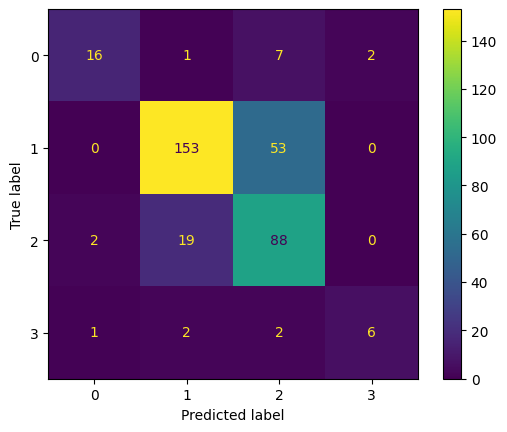

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(accuracy_score(y_actual, y_pred))
cf = ConfusionMatrixDisplay(confusion_matrix(y_actual, y_pred))
cf.plot()

0.7471590909090909


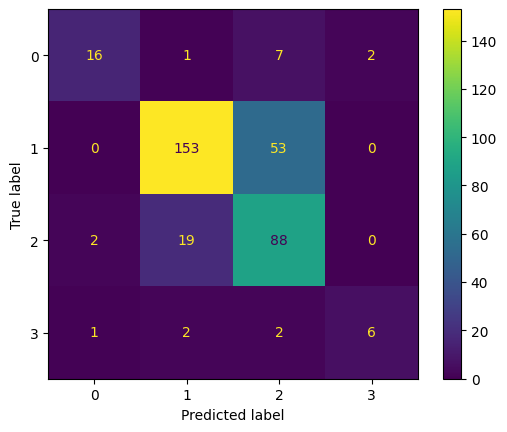

In [22]:
y_pred = model.predict(X_test)
y_pred = [y_pred[i].argmax() for i in range(len(y_pred))]
print(accuracy_score(y_actual, y_pred))
cf = ConfusionMatrixDisplay(confusion_matrix(y_actual, y_pred))
cf.plot()